Neural Network-Practical Work1 - Group A

Part A: KNN with holdout approach

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = np.loadtxt("C:\\Users\\User\\Downloads\\dataset.csv")

In [4]:
print(dataset)

[[ -1.43672208   7.16535885   1.        ]
 [  3.09377892   1.16107388   1.        ]
 [-10.49487488  -8.28538491   0.        ]
 [  2.1649069    2.19607749   1.        ]
 [-11.17441718 -10.17311908   0.        ]
 [  5.56770884  -1.59760527   2.        ]
 [  6.99563029   6.95779673   1.        ]
 [  4.57246249   3.95292715   2.        ]
 [ -6.93566828 -13.98972304   0.        ]
 [  1.94378247  -4.25650342   2.        ]
 [  3.76945427   7.17215802   1.        ]
 [ 10.20195651   7.16643267   1.        ]
 [  6.47991848   1.62817298   2.        ]
 [-12.25196093  -1.9436245    0.        ]
 [-12.7703489   -5.04845275   0.        ]
 [  1.10855235  -1.89539825   2.        ]
 [  8.45801772   2.87926467   1.        ]
 [  3.59401616   4.59654174   1.        ]
 [ -6.89057566  -9.30355445   0.        ]
 [ -1.70441622   2.94015958   2.        ]
 [  3.80346307   8.86619699   1.        ]
 [  2.47070622  10.53561466   1.        ]
 [  1.62117126   6.80776873   1.        ]
 [ -6.76284349  -7.4100745    0.  

In [5]:
dataset.shape

(300, 3)

In [6]:
y=dataset[0:300,1]
x=dataset[0:300,[0,1]]
target=dataset[0:300,2]

In [7]:
print(x)

[[ -1.43672208   7.16535885]
 [  3.09377892   1.16107388]
 [-10.49487488  -8.28538491]
 [  2.1649069    2.19607749]
 [-11.17441718 -10.17311908]
 [  5.56770884  -1.59760527]
 [  6.99563029   6.95779673]
 [  4.57246249   3.95292715]
 [ -6.93566828 -13.98972304]
 [  1.94378247  -4.25650342]
 [  3.76945427   7.17215802]
 [ 10.20195651   7.16643267]
 [  6.47991848   1.62817298]
 [-12.25196093  -1.9436245 ]
 [-12.7703489   -5.04845275]
 [  1.10855235  -1.89539825]
 [  8.45801772   2.87926467]
 [  3.59401616   4.59654174]
 [ -6.89057566  -9.30355445]
 [ -1.70441622   2.94015958]
 [  3.80346307   8.86619699]
 [  2.47070622  10.53561466]
 [  1.62117126   6.80776873]
 [ -6.76284349  -7.4100745 ]
 [ -2.76616272  -1.84330722]
 [ 11.3431052   -2.94447205]
 [ -4.84470092  -2.4715409 ]
 [ -0.80942308   2.72307283]
 [ -7.3201328   -5.24757545]
 [  3.61113567   5.18200365]
 [  2.35629265  -3.4762136 ]
 [ -5.15702779  -3.69246036]
 [ -1.49910614  -0.48794226]
 [  4.9310172    8.38136502]
 [  6.91883765

In [8]:
print(target)

[1. 1. 0. 1. 0. 2. 1. 2. 0. 2. 1. 1. 2. 0. 0. 2. 1. 1. 0. 2. 1. 1. 1. 0.
 0. 2. 0. 1. 0. 1. 2. 0. 2. 1. 2. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 2. 2. 2.
 1. 0. 0. 0. 1. 1. 1. 2. 1. 1. 0. 2. 0. 2. 1. 0. 0. 1. 2. 1. 2. 1. 2. 2.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 2. 1. 0. 1. 1. 1. 2. 2. 2. 2. 1. 0. 2. 1. 1.
 2. 2. 1. 0. 0. 1. 2. 0. 0. 0. 0. 2. 2. 1. 2. 1. 2. 0. 1. 0. 0. 1. 0. 2.
 1. 2. 0. 1. 1. 2. 0. 0. 0. 0. 0. 2. 1. 2. 0. 0. 0. 2. 0. 0. 2. 2. 0. 2.
 2. 0. 2. 1. 1. 1. 1. 1. 2. 2. 2. 0. 0. 2. 0. 2. 0. 1. 0. 0. 2. 2. 1. 2.
 2. 1. 2. 1. 0. 1. 1. 1. 1. 1. 2. 1. 2. 2. 0. 1. 2. 2. 1. 0. 0. 0. 1. 2.
 1. 2. 2. 0. 2. 1. 1. 1. 1. 2. 0. 2. 2. 2. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2.
 2. 0. 2. 0. 2. 1. 0. 0. 0. 2. 2. 0. 1. 2. 0. 0. 0. 0. 0. 1. 2. 2. 1. 2.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 0. 2. 0. 1. 1. 1. 1. 0. 1.
 2. 2. 0. 0. 0. 1. 2. 2. 2. 1. 0. 1. 0. 1. 1. 1. 2. 2. 1. 2. 2. 0. 2. 1.
 2. 2. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,target, train_size = 0.7, random_state = 42, stratify =target)

In [10]:
print(X_train.shape, y_train.shape)

(210, 2) (210,)


In [11]:
print(X_test.shape, y_test.shape)

(90, 2) (90,)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


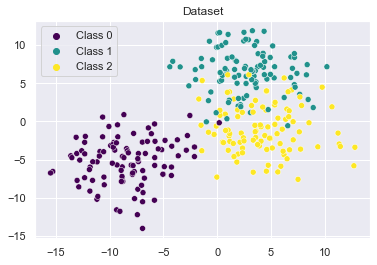

In [12]:
sns.scatterplot(x[:,0],y=x[:,1],hue=target,palette='viridis')
L=plt.legend()
L.get_texts()[0].set_text('Class 0')
L.get_texts()[1].set_text('Class 1')
L.get_texts()[2].set_text('Class 2')
plt.title('Dataset')
plt.show()

Fit the mode


In [69]:
one_NN = KNeighborsClassifier (n_neighbors = 1, algorithm = 'brute')
one_NN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))

[0. 0. 2. 2. 0. 0. 2. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 0. 0. 2. 1. 2. 0. 2.
 1. 2. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 0. 2. 2. 0.
 0. 1. 2. 2. 0. 0. 2. 0. 1. 2. 1. 2. 2. 1. 0. 1. 2. 2. 0. 0. 2. 0. 1. 0.
 2. 2. 0. 1. 2. 2. 1. 0. 2. 0. 2. 0. 1. 2. 2. 1. 2. 0.]


Evaluate the results
1. The accuracy rate 
2. Confusion matrix

The accuracy rate 

In [71]:
neigh.score(X_test, y_test)

0.8222222222222222

Confusion matrix

In [72]:
y_pred=one_NN.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  0,  1],
       [ 0, 21,  9],
       [ 0,  6, 24]], dtype=int64)

show KNN accuracy when you increase the number of neighbors ( for K=1 to 30 neighbors)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.3,random_state=42, stratify=target)

accuracy_list=[]
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_prediction = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    accuracy_list.append(accuracy)

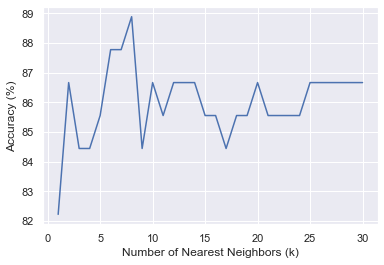

In [78]:
plt.plot(range(1,31), np.array(accuracy_list)*100)
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

In [79]:
accuracy_np=np.array(accuracy_list)
accuracy_list.index(max(accuracy_np))

7

# Part B: KNN with 5-fold cross validation approach

In order to train and test the model using cross-validation, we can use the ‘cross_val_score’ function with a cross-validation value of 5.

In [81]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv,x,target, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)

[0.88333333 0.98333333 0.9        0.9        0.81666667]


In [82]:
np.mean(cv_scores)

0.8966666666666667